In [282]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

import gym
import random
import numpy as np

env = gym.make("CartPole-v0")

In [289]:
class Net(nn.Module):
  
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(5, 64)
        # self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 16)
        # self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 4)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


In [290]:
loss_fn = torch.nn.MSELoss(reduction="sum")
η = 1e-3
model = Net()
opt = Adam(model.parameters(), lr = η)
    

Epoch 0 done


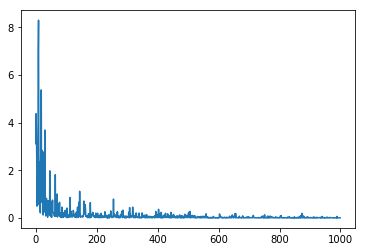

In [291]:
l = []
for epoch in range(1000): 
    
    curr = env.reset()
    for i in range(200):

        # Generate a random step 
        st = random.randint(0,1)

        # Get simulated result from the environment
        nex, rew, done, info = env.step(st)
        nex = torch.from_numpy(nex).float()

        # Check if done and then break
        if done:
            break

        # Create input for our network and generate prediction
        input = torch.from_numpy(np.append(curr,st)).float()
        nex_pred = model(input)

        # Calculate loss
        loss = loss_fn(nex_pred, nex)

        # Backprop
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        curr = nex
        
    l.append(loss.item())
    
    epoch % 1000 == 0 and print("Epoch %d done" % epoch)
    
plt.plot(l)

In [292]:
l[-1]

0.0040070414543151855

nex =  tensor([ 0.0354,  0.1953,  0.0380, -0.2946])
nex_pred =  tensor([-0.0396,  0.2218,  0.0196, -0.2894], grad_fn=<ThAddBackward>)
loss =  0.01873822510242462
nex =  tensor([ 0.0272,  0.1549,  0.0326, -0.2572])
nex_pred =  tensor([-0.0409,  0.1810,  0.0159, -0.2566], grad_fn=<ThAddBackward>)
loss =  0.01846432313323021
nex =  tensor([-0.0372, -0.2155,  0.0442,  0.2900])
nex_pred =  tensor([-0.0477, -0.1918,  0.0366,  0.2826], grad_fn=<ThAddBackward>)
loss =  0.002153719076886773
nex =  tensor([-0.0256,  0.1810,  0.0096, -0.3041])
nex_pred =  tensor([-0.0503,  0.1910,  0.0095, -0.3272], grad_fn=<ThAddBackward>)
loss =  0.003511992748826742
nex =  tensor([ 0.0280, -0.2097,  0.0208,  0.3218])
nex_pred =  tensor([-0.0253, -0.2034,  0.0217,  0.3099], grad_fn=<ThAddBackward>)
loss =  0.007826524786651134
nex =  tensor([-0.0483,  0.1662, -0.0283, -0.3438])
nex_pred =  tensor([-0.0468,  0.1649, -0.0143, -0.3814], grad_fn=<ThAddBackward>)
loss =  0.004177589900791645
nex =  tensor([ 0.0250, 

nex =  tensor([ 0.0332, -0.2223,  0.0136,  0.3277])
nex_pred =  tensor([-0.0224, -0.2182,  0.0154,  0.3144], grad_fn=<ThAddBackward>)
loss =  0.008257918059825897
nex =  tensor([-0.0276, -0.1542,  0.0244,  0.3195])
nex_pred =  tensor([-0.0399, -0.1703,  0.0397,  0.2899], grad_fn=<ThAddBackward>)
loss =  0.004260935354977846
nex =  tensor([ 0.0183,  0.2351, -0.0085, -0.2726])
nex_pred =  tensor([-0.0313,  0.2077,  0.0053, -0.3019], grad_fn=<ThAddBackward>)
loss =  0.011817414313554764
nex =  tensor([-0.0390,  0.2235, -0.0288, -0.3357])
nex_pred =  tensor([-0.0434,  0.1996, -0.0064, -0.3811], grad_fn=<ThAddBackward>)
loss =  0.007753781042993069
nex =  tensor([ 0.0115,  0.2126,  0.0427, -0.2704])
nex_pred =  tensor([-0.0479,  0.2280,  0.0315, -0.2760], grad_fn=<ThAddBackward>)
loss =  0.011314024217426777
nex =  tensor([ 0.0006,  0.2184, -0.0333, -0.2612])
nex_pred =  tensor([-0.0299,  0.1751, -0.0071, -0.3062], grad_fn=<ThAddBackward>)
loss =  0.016129452735185623
nex =  tensor([-0.0076

nex =  tensor([-0.0253, -0.1897, -0.0088,  0.2775])
nex_pred =  tensor([-0.0293, -0.2072,  0.0060,  0.2447], grad_fn=<ThAddBackward>)
loss =  0.004806928336620331
nex =  tensor([-0.0479,  0.2098,  0.0208, -0.2896])
nex_pred =  tensor([-0.0600,  0.2121,  0.0253, -0.3210], grad_fn=<ThAddBackward>)
loss =  0.003208750858902931
nex =  tensor([-0.0127,  0.1644, -0.0218, -0.2506])
nex_pred =  tensor([-0.0376,  0.1445, -0.0059, -0.2882], grad_fn=<ThAddBackward>)
loss =  0.008918552659451962
nex =  tensor([-0.0489, -0.2322,  0.0489,  0.3164])
nex_pred =  tensor([-0.0532, -0.2085,  0.0420,  0.3077], grad_fn=<ThAddBackward>)
loss =  0.0017661054152995348
nex =  tensor([-0.0413,  0.1450,  0.0147, -0.2416])
nex_pred =  tensor([-0.0564,  0.1530,  0.0163, -0.2709], grad_fn=<ThAddBackward>)
loss =  0.004049084149301052
nex =  tensor([ 0.0165, -0.2400, -0.0103,  0.3235])
nex_pred =  tensor([-0.0202, -0.2499, -0.0016,  0.2997], grad_fn=<ThAddBackward>)
loss =  0.005181504879146814
nex =  tensor([-0.042

nex =  tensor([ 0.0382,  0.1468, -0.0090, -0.3040])
nex_pred =  tensor([-0.0263,  0.1603, -0.0156, -0.3103], grad_fn=<ThAddBackward>)
loss =  0.01302644144743681
nex =  tensor([ 0.0124,  0.1850, -0.0170, -0.2612])
nex_pred =  tensor([-0.0313,  0.1658, -0.0051, -0.2906], grad_fn=<ThAddBackward>)
loss =  0.010249309241771698
nex =  tensor([-0.0490, -0.2304,  0.0396,  0.2881])
nex_pred =  tensor([-0.0497, -0.2063,  0.0321,  0.2787], grad_fn=<ThAddBackward>)
loss =  0.0019390730885788798
nex =  tensor([ 0.0128,  0.2043,  0.0176, -0.2492])
nex_pred =  tensor([-0.0405,  0.1992,  0.0186, -0.2675], grad_fn=<ThAddBackward>)
loss =  0.009916441515088081
nex =  tensor([ 0.0126,  0.1727, -0.0329, -0.2892])
nex_pred =  tensor([-0.0271,  0.1545, -0.0191, -0.3194], grad_fn=<ThAddBackward>)
loss =  0.008891811594367027
nex =  tensor([-0.0412,  0.2062,  0.0026, -0.3136])
nex_pred =  tensor([-0.0529,  0.2041,  0.0109, -0.3470], grad_fn=<ThAddBackward>)
loss =  0.003506010863929987
nex =  tensor([-0.0168

nex =  tensor([ 0.0204,  0.2053, -0.0487, -0.3485])
nex_pred =  tensor([-0.0202,  0.1816, -0.0309, -0.3796], grad_fn=<ThAddBackward>)
loss =  0.008574011735618114
nex =  tensor([ 0.0153,  0.2400, -0.0226, -0.2670])
nex_pred =  tensor([-0.0282,  0.1992, -0.0006, -0.3050], grad_fn=<ThAddBackward>)
loss =  0.015250825323164463
nex =  tensor([ 0.0270, -0.1614, -0.0422,  0.2557])
nex_pred =  tensor([-0.0060, -0.1993, -0.0177,  0.2173], grad_fn=<ThAddBackward>)
loss =  0.01499586459249258
nex =  tensor([-0.0403, -0.2170, -0.0450,  0.3153])
nex_pred =  tensor([-0.0248, -0.2653, -0.0130,  0.2634], grad_fn=<ThAddBackward>)
loss =  0.016266997903585434
nex =  tensor([ 0.0248,  0.2313,  0.0194, -0.3140])
nex_pred =  tensor([-0.0373,  0.2367,  0.0142, -0.3227], grad_fn=<ThAddBackward>)
loss =  0.010204714722931385
nex =  tensor([-0.0434, -0.1664, -0.0475,  0.2980])
nex_pred =  tensor([-0.0239, -0.2274, -0.0075,  0.2371], grad_fn=<ThAddBackward>)
loss =  0.02709384076297283
nex =  tensor([ 0.0343, 

nex =  tensor([ 0.0155,  0.2405, -0.0088, -0.2506])
nex_pred =  tensor([-0.0320,  0.2047,  0.0091, -0.2846], grad_fn=<ThAddBackward>)
loss =  0.014406198635697365
nex =  tensor([ 0.0468, -0.2167,  0.0065,  0.3236])
nex_pred =  tensor([-0.0168, -0.2164,  0.0100,  0.3092], grad_fn=<ThAddBackward>)
loss =  0.010851651430130005
nex =  tensor([ 0.0093, -0.1489,  0.0013,  0.2844])
nex_pred =  tensor([-0.0228, -0.1686,  0.0170,  0.2553], grad_fn=<ThAddBackward>)
loss =  0.007818173617124557
nex =  tensor([ 0.0457,  0.2091, -0.0157, -0.2514])
nex_pred =  tensor([-0.0214,  0.1821, -0.0042, -0.2749], grad_fn=<ThAddBackward>)
loss =  0.017894191667437553
nex =  tensor([ 0.0422, -0.1628, -0.0144,  0.2908])
nex_pred =  tensor([-0.0106, -0.1864,  0.0026,  0.2619], grad_fn=<ThAddBackward>)
loss =  0.013276109471917152
nex =  tensor([ 0.0130,  0.2128,  0.0246, -0.2803])
nex_pred =  tensor([-0.0424,  0.2182,  0.0200, -0.2923], grad_fn=<ThAddBackward>)
loss =  0.00924611371010542
nex =  tensor([-0.0064,

nex =  tensor([-0.0038,  0.1528,  0.0353, -0.3190])
nex_pred =  tensor([-0.0512,  0.1964,  0.0141, -0.3182], grad_fn=<ThAddBackward>)
loss =  0.012943343259394169
nex =  tensor([ 0.0039,  0.1465,  0.0120, -0.2635])
nex_pred =  tensor([-0.0422,  0.1612,  0.0058, -0.2771], grad_fn=<ThAddBackward>)
loss =  0.008513042703270912
nex =  tensor([-0.0153, -0.2103,  0.0339,  0.3133])
nex_pred =  tensor([-0.0399, -0.1986,  0.0328,  0.3009], grad_fn=<ThAddBackward>)
loss =  0.002363306237384677
nex =  tensor([ 0.0313, -0.2440,  0.0145,  0.3033])
nex_pred =  tensor([-0.0225, -0.2267,  0.0080,  0.2978], grad_fn=<ThAddBackward>)
loss =  0.008356069214642048
nex =  tensor([ 0.0389,  0.1925,  0.0467, -0.2547])
nex_pred =  tensor([-0.0409,  0.2155,  0.0285, -0.2491], grad_fn=<ThAddBackward>)
loss =  0.02231607586145401
nex =  tensor([-0.0281, -0.1448, -0.0412,  0.2468])
nex_pred =  tensor([-0.0198, -0.1921, -0.0094,  0.1963], grad_fn=<ThAddBackward>)
loss =  0.0201856829226017
nex =  tensor([-0.0133,  

nex =  tensor([-0.0388,  0.1738,  0.0414, -0.3052])
nex_pred =  tensor([-0.0633,  0.2082,  0.0277, -0.3178], grad_fn=<ThAddBackward>)
loss =  0.005999395623803139
nex =  tensor([-0.0336,  0.2343, -0.0052, -0.2762])
nex_pred =  tensor([-0.0480,  0.2068,  0.0143, -0.3197], grad_fn=<ThAddBackward>)
loss =  0.008883370086550713
nex =  tensor([-0.0434,  0.1662, -0.0023, -0.2974])
nex_pred =  tensor([-0.0524,  0.1702,  0.0042, -0.3297], grad_fn=<ThAddBackward>)
loss =  0.0034500977490097284
nex =  tensor([-0.0404,  0.2134,  0.0007, -0.2925])
nex_pred =  tensor([-0.0520,  0.2015,  0.0133, -0.3304], grad_fn=<ThAddBackward>)
loss =  0.005132434889674187
nex =  tensor([-0.0484, -0.2149,  0.0066,  0.2727])
nex_pred =  tensor([-0.0397, -0.2152,  0.0126,  0.2476], grad_fn=<ThAddBackward>)
loss =  0.0021265908144414425
nex =  tensor([ 0.0228, -0.1701,  0.0419,  0.3465])
nex_pred =  tensor([-0.0326, -0.1680,  0.0471,  0.3354], grad_fn=<ThAddBackward>)
loss =  0.00829483661800623
nex =  tensor([ 0.001

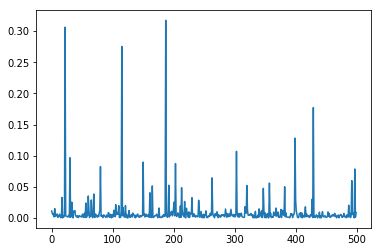

In [294]:
t = []
for epoch in range(500): 
    
    curr = env.reset()
    for i in range(200):

        # Generate a random step 
        st = random.randint(0,1)

        # Get simulated result from the environment
        nex, rew, done, info = env.step(st)
        nex = torch.from_numpy(nex).float()
        
        # Check if done and then break
        if done:
            break

        # Create input for our network and generate prediction
        input = torch.from_numpy(np.append(curr,st)).float()
        nex_pred = model(input)

        # Calculate loss
        loss = loss_fn(nex_pred, nex) / torch.norm(nex)
        
        if i %100 == 0:
            print("nex = ", nex)
            print("nex_pred = ", nex_pred)
            print("loss = ", loss.item())


        # Backprop
        # opt.zero_grad()
        # loss.backward()
        # opt.step()
        
        curr = nex
        
    t.append(loss.item())
    
    # epoch % 1000 == 0 and print("Epoch %d done" % epoch)
    
plt.plot(t)

In [288]:
init = env.reset()
init

array([-0.04015303, -0.03614903,  0.03989927,  0.02288957])

In [85]:
?model.fc1

In [248]:
?nn.BatchNorm1d